# BME-336546-C03-Linear regression

Before we begin, please make sure you have updated the `bm-336546` using `tutorial3.yml`.

## Medical topic
Health insurance companies pay out in the event of a health hazard to an insured party (beneficiary). In general, the higher the risk of a person getting sick or injured, the higher the monthly insurance premium (payments) are. Insurance companies need to accurately estimate risk and set premium prices accordingly. They cannot simply set the same price for all of their beneficiaries. 

When setting insurance premiums, the insurance companies set some "measurable" criteria (features in our language) and compare those criteria to costs that have already been paid out in the past (output or labels). By relating the costs to those features, they can estimate how much they can expect to pay out in the future and hence correctly set the price of future premiums. 



## Dataset

Our dataset is composed of the following features ($ X $) and the charges ($ y $).

- Age: age of primary beneficiary.

- Gender: insurance contractor gender: male or a female.

- BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height. Objective index of body mass $[kg / m ^ 2]$ uses the ratio of height to weight, ideally 18.5 to 24.9.

- Children: Number of children covered by health insurance / Number of dependents.

- Smoker: Binary feature for smoking.

- Region: The beneficiary's residential area in the US: northeast, southeast, southwest, northwest (maybe related to socioeconomic status).

- Charges: Individual medical costs billed by health insurance.

credit: https://github.com/stedy/Machine-Learning-with-R-datasets 

## Main ML topic: supervised learning
The ML topic falls into the field of supervised learning since we train a model to have a prediction based on the relations of previously "seen" outputs (charges) and inputs (features). At this tutorial, we would be dealing with linear regression.

## Our mission
Prediction of health insurance costs based on *explanatory variables* using *linear regression* applied on different models. \
The model will be "trained" on part of the dataset which will be called `X_train` and the prediction would be applied on a hidden part of the dataset which is called `X_test`. \
This partition is an ML topic that would be widely covered soon.

## Theory reminders


    
Given $ X \in \mathbb{R} ^{mxn_x} $ and $ y \in \mathbb{R}^{m} $, we look for $ w \in \mathbb{R} ^{n_x} $ that would minimize the following term: 

$$ \begin{equation}
\parallel y - \hat{y} \parallel^2_2 \space = \space \parallel y - Xw \parallel^2_2
\label{eq:mse} \tag{1}
\end{equation} $$ 

Let's visualize some of the terms: 

<center><img src="images/lin_reg.png"><center>

This is called the *MSE* (the mean value is simply a factor of $ m $).
Notice that we would also like to find the bias so we actually should create the following: 

$$ \begin{equation}
\tilde{X} = \begin{pmatrix}
    1 & x_{11} & x_{12} & x_{13} & \dots  & x_{1n_x} \\
    1 & x_{21} & x_{22} & x_{23} & \dots  & x_{2n_x} \\
    \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn_x}
\end{pmatrix} \in \mathbb{R} ^{mxn_{x}+1}, \space \tilde{w} = \begin{pmatrix}
b \\
w
\end{pmatrix} \in \mathbb{R} ^{n_{x}+1}
\label{eq:rearrange mat} \tag{2}
\end{equation}
$$ 


From now on we will use the same notations of $ X, w $ for the matrix and vector defined in equation (2). \
This problem is convex and thus has a single minima if our model is linear with its parameters i.e. it is possible to estimate our predictors as matrices multiplication of the feature's matrix (or mapped features) with the coefficients vector.
The solution of this problem is given by the pseudoinverse:

$$\begin{equation}
w = (X^{T}X)^{-1}X^{T}y
\label{eq:pseudo} \tag{3}
\end{equation}
$$

This problem can also be solved iteratively using a well known method called "*gradient descent*". \
If we define $ x^{(i)} $ to be an observation **column**, by transposing the $i^{th}$ row so that $ x^{(i)} \in \mathbb{R}^{n_{x}+1} $, then our cost function is defined as: 

$$\begin{equation}
J(w) = \frac{1}{2B}\sum\limits_{i=1}^{B}(y^{(i)} - w^Tx^{(i)})^2 
\label{eq:SGD cost} \tag{4}
\end{equation}
$$ 

The weights vector ($ w $) is updated in every iteration ($n$) as follows: 

$$\begin{equation}
w_{n+1} = w_n - \alpha \triangledown J(w_n)
\label{eq:SGD} \tag{5}
\end{equation}
$$

In our case:

$$\begin{equation}
\triangledown J(w) = -\frac{1}{B}\sum\limits_{i=1}^{B}(y^{(i)} - w^Tx^{(i)})x^{(i)} 
\label{eq:SGD grad} \tag{6}
\end{equation}
$$

Convergence is guaranteed if the cost function is convex and the learning rate $ (\alpha) $ is small enough. \
Ideally, we would begin with large learning rates and decrease them as we get closer to convergence; however, we will not deal with that type of gradient descent for now.


<center><img src="images/gradient-descent.JPG"><center>

When $ B = 1 $, the method is known as *Stochastic Gradient Descent (SGD)* and when $ 1 < B \le m $ it is known as *Batch Gradient Descent (BGD)*.

Either way, once $ w $ was "learned" we can have a new beneficiary with his own "features" $ (x_1, x_2 \dots, x_n) $ and simply estimate the future health insurance costs by using:

$$\begin{equation}
y = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n
\label{eq:linear estimation} \tag{7}
\end{equation}
$$


## Data loading

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import random

%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

random.seed(10)


In [10]:
X = pd.read_csv("data/insurance.csv")
print(X.sample(8, random_state=5))

      age     sex     bmi  children smoker     region      charges
471    18  female  30.115         0     no  northeast   2203.47185
1250   24    male  29.830         0    yes  northeast  18648.42170
1257   54  female  27.645         1     no  northwest  11305.93455
139    22  female  36.000         0     no  southwest   2166.73200
919    35  female  34.210         1     no  southeast   5245.22690
488    44  female  38.060         0    yes  southeast  48885.13561
691    47    male  36.200         1     no  southwest   8068.18500
159    50  female  27.830         3     no  southeast  19749.38338


# Commonly encountered issue: dummy coding


In many medical datasets we have categorical variables. Some of them are binary (such as male/female smoker/non-smoker etc.) and some are multi-variables such as residential region. 

So, how should we treat those kind of explanatory variables? \
We can "dummy code" it. Basically if we have $ K $ categories, we can define $ K-1 $ explanatory variables that are binary and would indicate the $ k^{th} $ category existence with the code $ 1 $.

For more information please address: https://www.statisticssolutions.com/dummy-coding-the-how-and-why/

Fortunately, *pandas* has this function built in for categorical variables denoted as strings.

In [17]:
X = pd.get_dummies(data=X, drop_first=True, dtype= 'float64')
print(X.sample(50, random_state=5))

      age     bmi  children      charges  sex_male  smoker_yes  \
471    18  30.115         0   2203.47185       0.0         0.0   
1250   24  29.830         0  18648.42170       1.0         1.0   
1257   54  27.645         1  11305.93455       0.0         0.0   
139    22  36.000         0   2166.73200       0.0         0.0   
919    35  34.210         1   5245.22690       0.0         0.0   
488    44  38.060         0  48885.13561       0.0         1.0   
691    47  36.200         1   8068.18500       1.0         0.0   
159    50  27.830         3  19749.38338       0.0         0.0   
1239   25  42.130         1   3238.43570       0.0         0.0   
779    53  28.880         0   9869.81020       1.0         0.0   
722    62  37.400         0  12979.35800       1.0         0.0   
463    56  25.935         0  11165.41765       1.0         0.0   
600    18  39.160         0   1633.04440       0.0         0.0   
1003   48  29.600         0  21232.18226       1.0         0.0   
1285   47 

## Data preprocessing and exploration

We will start with the summary statistics. Print it using `pandas`.

In [ ]:
#-----------------------Implement your code here-------------------
print(X.describe())
#------------------------------------------------------------------

               age          bmi     children       charges     sex_male  \
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000   
mean     39.207025    30.663397     1.094918  13270.422265     0.505232   
std      14.049960     6.098187     1.205493  12110.011237     0.500160   
min      18.000000    15.960000     0.000000   1121.873900     0.000000   
25%      27.000000    26.296250     0.000000   4740.287150     0.000000   
50%      39.000000    30.400000     1.000000   9382.033000     1.000000   
75%      51.000000    34.693750     2.000000  16639.912515     1.000000   
max      64.000000    53.130000     5.000000  63770.428010     1.000000   

        smoker_yes  region_northwest  region_southeast  region_southwest  
count  1338.000000       1338.000000       1338.000000       1338.000000  
mean      0.204783          0.242900          0.272048          0.242900  
std       0.403694          0.428995          0.445181          0.428995  
min       0.000000      

### Expected output:
<center><img src="outputs/1.PNG" width="480"><center>

Now let's have a look at the distribution (using histograms) of every variable in our data. Make sure they are clearly visible by adjusting `figsize`. \
Don't forget to label X and Y.

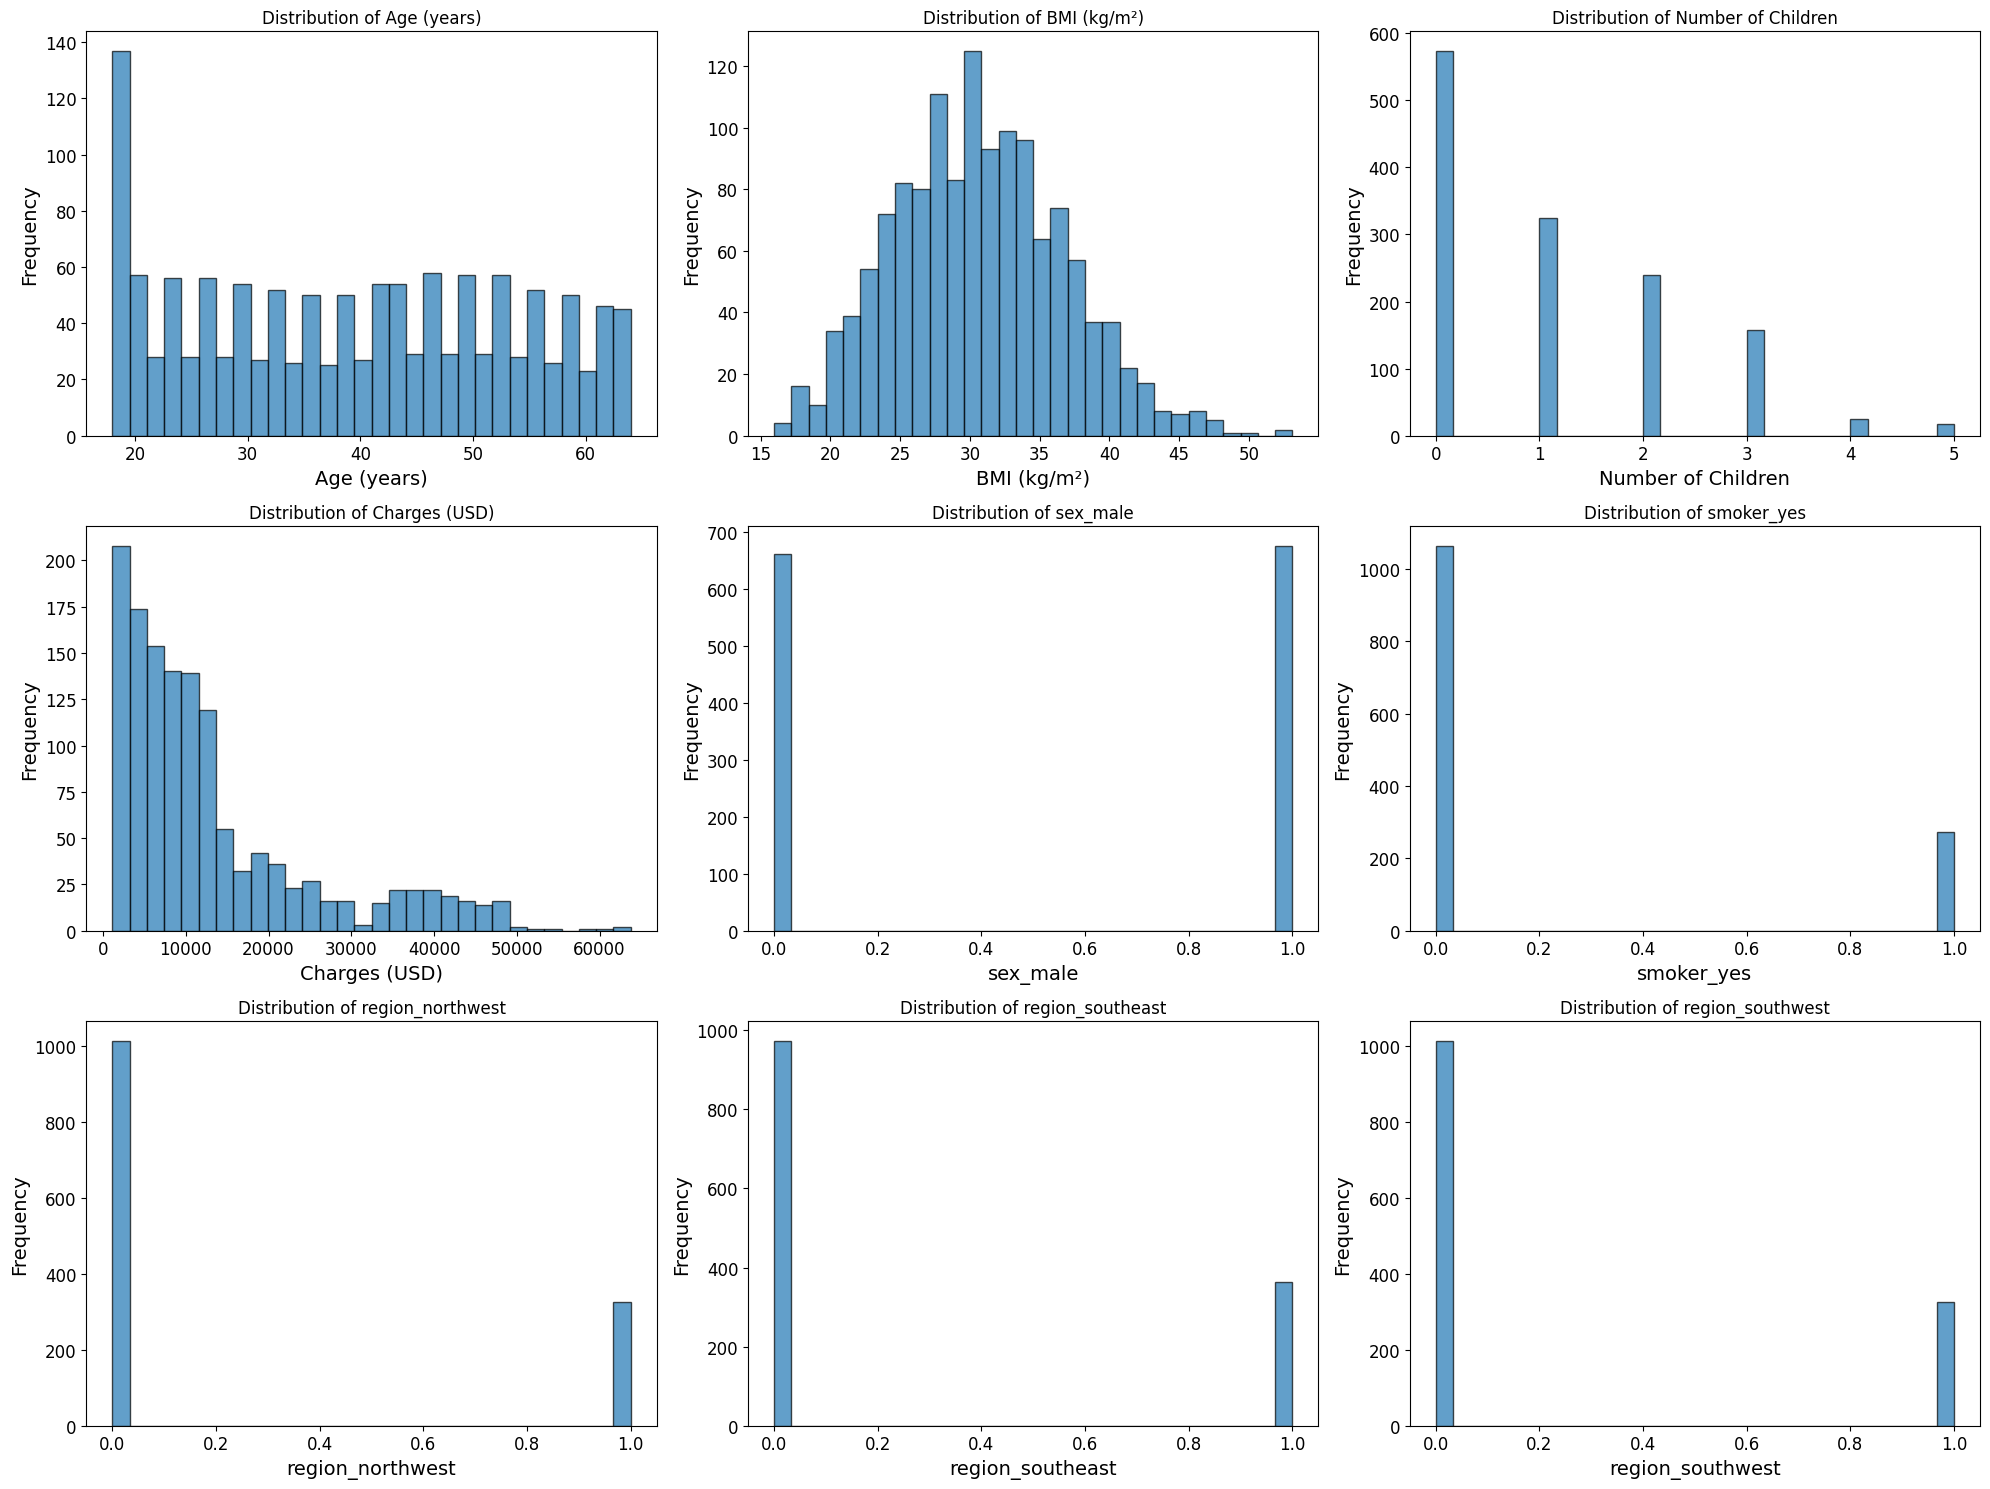

In [15]:
plt.figure(figsize=(20, 15))  # Adjust figure size for clear visibility

# Create a histogram for each column in the dataframe with appropriate units
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(X[column], bins=30, edgecolor='black', alpha=0.7)
    
    # Add appropriate units to the x-axis labels
    if column == 'age':
        xlabel = 'Age (years)'
    elif column == 'bmi':
        xlabel = 'BMI (kg/m²)'
    elif column == 'children':
        xlabel = 'Number of Children'
    elif column == 'charges':
        xlabel = 'Charges (USD)'
    elif column.startswith('sex') or column.startswith('smoker') or column.startswith('region'):
        xlabel = column  # These are binary/categorical variables, no units needed
    else:
        xlabel = column
        
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {xlabel}')
    
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### Expected output:
<center><img src="outputs/2.PNG" width="480"><center>

Look at the correlation between *age* and *charges* using a scatter plot. Don't forget to put labels, units and legend as needed.

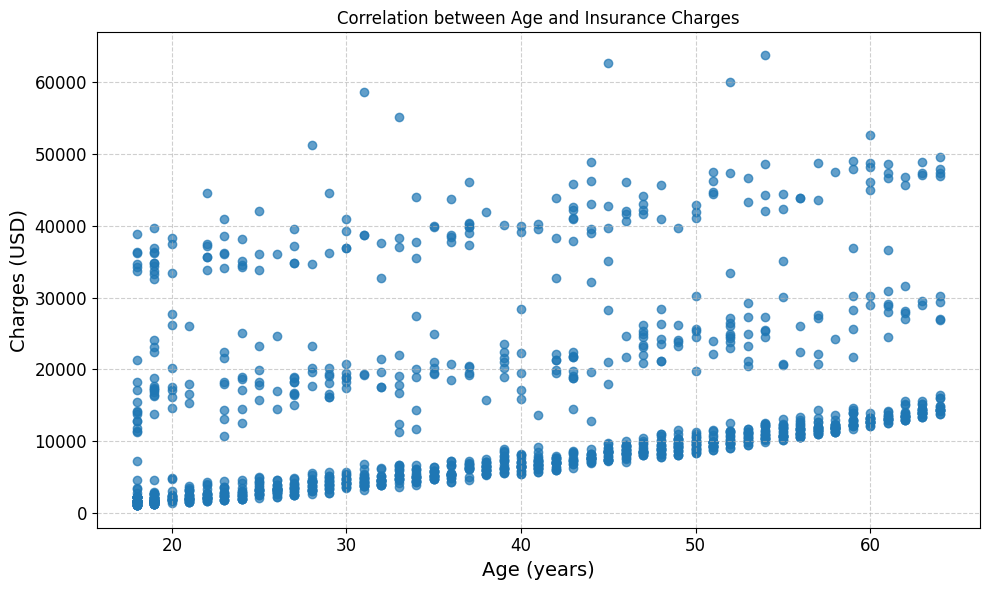

In [ ]:
#-----------------------Implement your code here-------------------
plt.figure(figsize=(10, 6))
plt.scatter(X['age'], X['charges'], alpha=0.7)
plt.xlabel('Age (years)')
plt.ylabel('Charges (USD)')
plt.title('Correlation between Age and Insurance Charges')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
#------------------------------------------------------------------

### Expected output:
<center><img src="outputs/4.PNG" width="430"><center>

---
<span style="color:red">***Question:***</span> *What does the figure tell us? Does the trend of the data make sense to you?*

---

We can notice from the figure that there are at least two "groups (modes)" in our data. \
Can you point out which of the explanatory variables is probably the cause of these modes for some beneficiaries? \
Visualize your suggestion. Add labels. The labels in the expected output was hidden on purpose.

---
<span style="color:red">***Question:***</span> *Which explanatory variable corresponds with what group?*

---

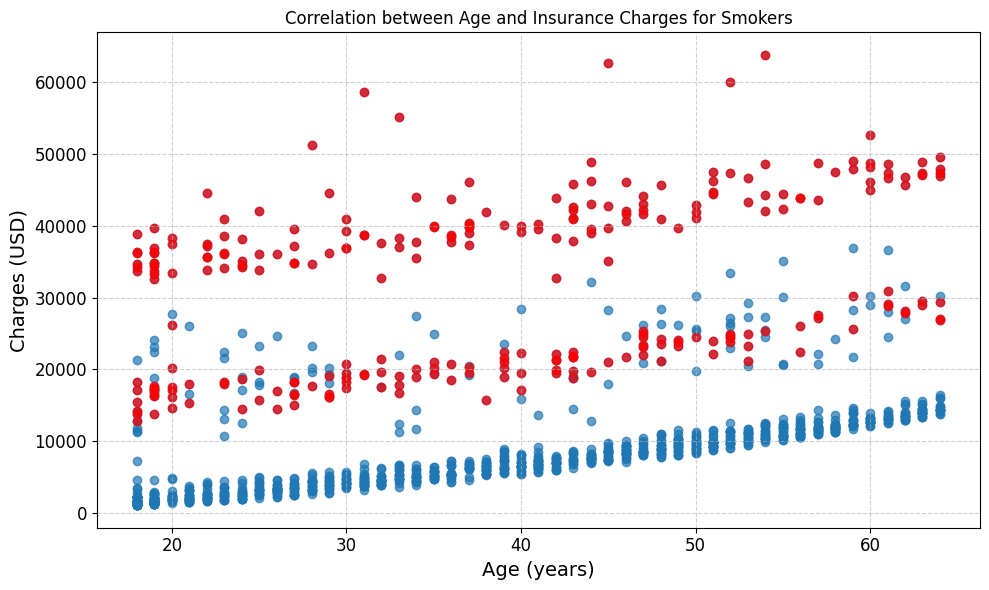

In [21]:
#-----------------------Implement your code here-------------------
plt.figure(figsize=(10, 6))

# Filter data for smokers
smokers = X[X['smoker_yes'] == 1.0]
plt.scatter(X['age'], X['charges'], alpha=0.7)
# Create scatter plot for smokers
plt.scatter(smokers['age'], smokers['charges'], alpha=0.7, color='red')

plt.xlabel('Age (years)')
plt.ylabel('Charges (USD)')
plt.title('Correlation between Age and Insurance Charges for Smokers')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
#------------------------------------------------------------------

### Expected output:
<center><img src="outputs/5.PNG" width="430"><center>

Try the same suspected explanatory variable on charges vs bmi instead of age.

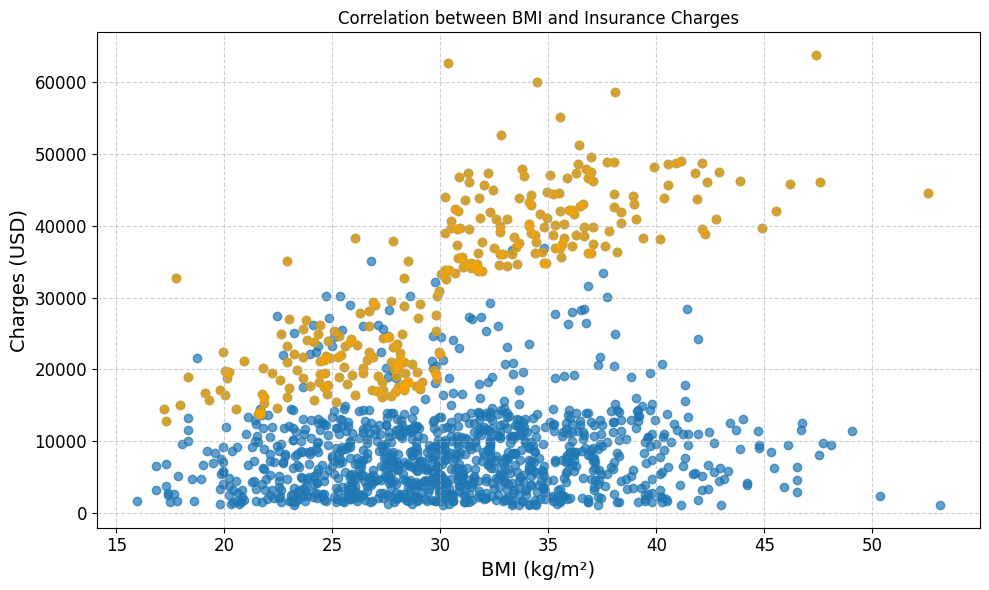

In [23]:
#-----------------------Implement your code here-------------------
plt.figure(figsize=(10, 6))

# Filter data for smokers
smokers = X[X['smoker_yes'] == 1.0]
plt.scatter(X['bmi'], X['charges'], alpha=0.7)
# Create scatter plot for smokers
plt.scatter(smokers['bmi'], smokers['charges'], alpha=0.7, color='orange')

plt.xlabel('BMI (kg/m²)')
plt.ylabel('Charges (USD)')
plt.title('Correlation between BMI and Insurance Charges')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
#------------------------------------------------------------------

### Expected output:
<center><img src="outputs/6.PNG" width="430"><center>

And finally, if we assume linear model, we can use the correlation matrix to visualize the correlation between all the categories. \
Use `sns.heatmap` and `X.corr()` for the visualization of the correlations. \
Again, make sure all of the variables' correlations and names are clearly seen. 

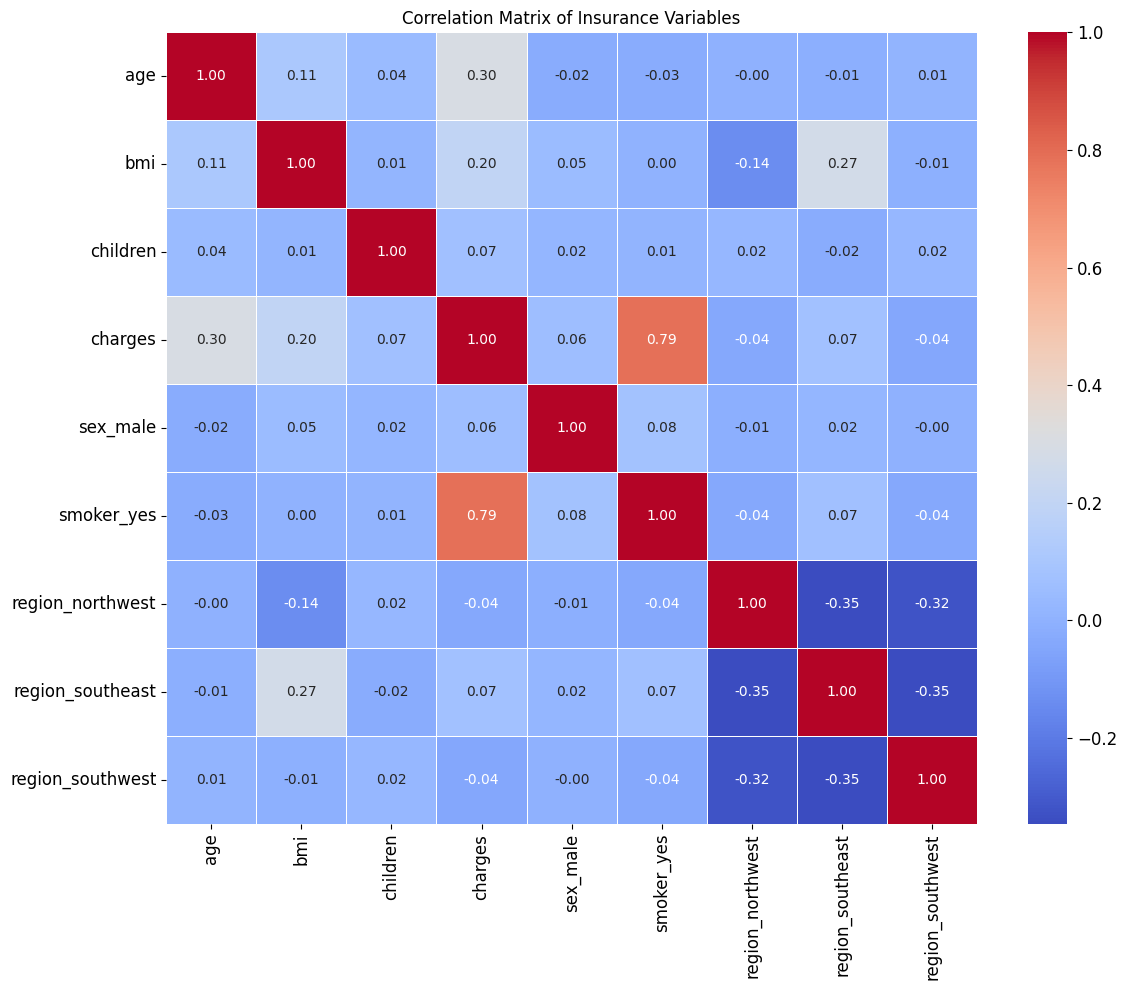

In [24]:
#-----------------------Implement your code here-------------------
plt.figure(figsize=(12, 10))  # Adjust figure size for better visibility
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Insurance Variables')
plt.tight_layout()
plt.show()
#------------------------------------------------------------------

### Expected output:
<center><img src="outputs/7.PNG" width="480"><center>

---
<span style="color:red">***Question:***</span> *What can you tell about the importance of each variable in the aspect of costs? Does it make sense to you?*

---

## Specific task:
OK, now for the learning part.<br><br>
Apply linear regression of beneficiary's "features" and his/her insurance's costs.


The data will be divided now to input and output $ (X, y) $ and we will add the bias elements. Then we will divide our set into training and testing sets. \
**You should implement the closed form of the solution** (using only `numpy`, eq. 3 and eq. 7) on the training set and finally plot the prediction on both the test set (`y_pred_test`) and the trainig set (`y_pred_train`) on top of the adequate ground truth.

In [25]:
y = X['charges']
X.drop(columns='charges', inplace=True)
X = X.to_numpy() # can also be X.values
y = y.to_numpy() # can also be y.values
X = np.concatenate((np.ones((len(y), 1)), X), axis=1) # add bias term
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
#--------------Implement your code here-------------------------
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Compute the weights using the training set
theta = normal_equation(X_train, y_train)

# Make predictions
y_pred_train = X_train @ theta
y_pred_test = X_test @ theta
#---------------------------------------------------------------
gt_array = [y_train, y_test] # ground truth
pred_array = [y_pred_train, y_pred_test] # predictions

In [30]:
def plot_gt_vs_pred(gt_array, pred_array):
    title =['Train', 'Train', 'Test', 'Test']
    plot_vars = [(gt_array[0], pred_array[0]), (gt_array[1], pred_array[1])]
    fig, axes = plt.subplots(2,2, figsize=(15,11))
    for idx, ax in enumerate(axes.flatten()):
        gt, pred = plot_vars[idx>=2]
        if np.mod(idx, 2) == 0:
            ax.scatter(np.arange(len(gt)), gt, label='ground truth')
            ax.scatter(np.arange(len(gt)), pred, label='prediction')
            ax.legend()
            ax.set_xlabel('# of beneficiary')
            ax.set_ylabel('Charges [$]')
            ax.set_title(title[idx])
        else:        
            sns.histplot(gt - pred, ax=ax, kde=True, fill=True, alpha=0.3, linewidth=0)
            ax.set_title(title[idx])
            ax.set_xlabel('ground truth - prediction')
            ax.set_ylabel('pdf')
    plt.show()

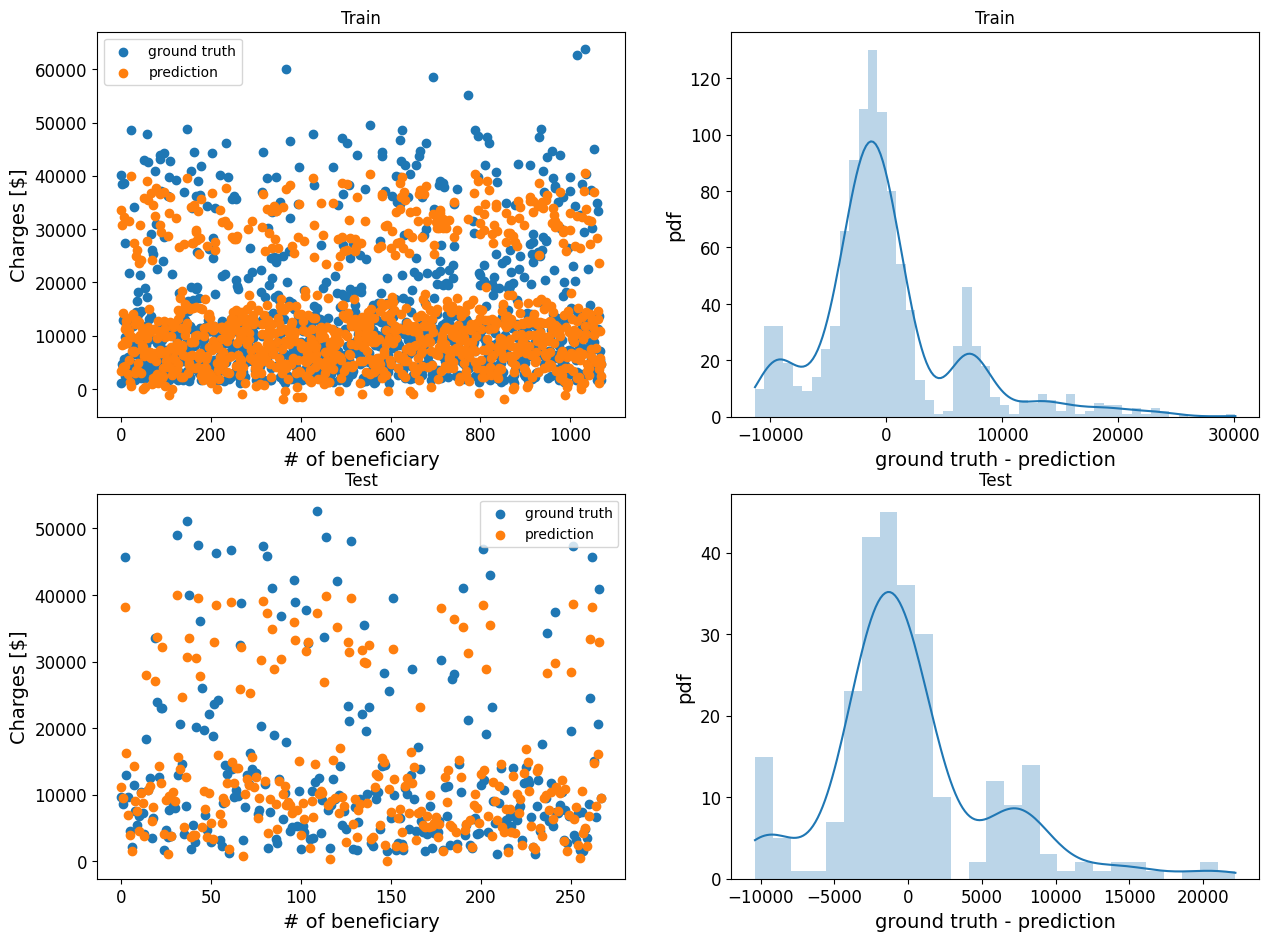

In [31]:
plot_gt_vs_pred(gt_array, pred_array)

### Expected output:
<center><img src="outputs/8.PNG" width="480"><center>

---
<span style="color:red">***Question:***</span> *What can you tell about the performance of the regression?*

---

**Please stop here and address the TA before you continue**.


Now we will try to implement the same estimation but with sequential learning (gradient descent).

**First, it is very important to standardize the data because SGD is very sensitive to large variations of the gradient that can be induced due to the values of the dataset.** \
Use `StandardScaler` function in order to do so and pay close attention to what should you scale and what you shouldn't. Notice that scaling **after** dividing into train and test sets avoids information leakage.


Implement the correct standardization on the training and testing sets. **The scaled matrices or vectors names should be the same as previous scaling.** Pay close attention to which variables scaling should be applied and how to standardize the testing set.

In [32]:
scaler = StandardScaler()
#--------------Implement your code here-------------------------
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])  # Fit on train, transform train
X_test[:, 1:] = scaler.transform(X_test[:, 1:])  # Transform test with the same scaler
#---------------------------------------------------------------

Now implement SGD and plot the MSE as a function of the iterations (learning curve in general) for both training and testing sets.

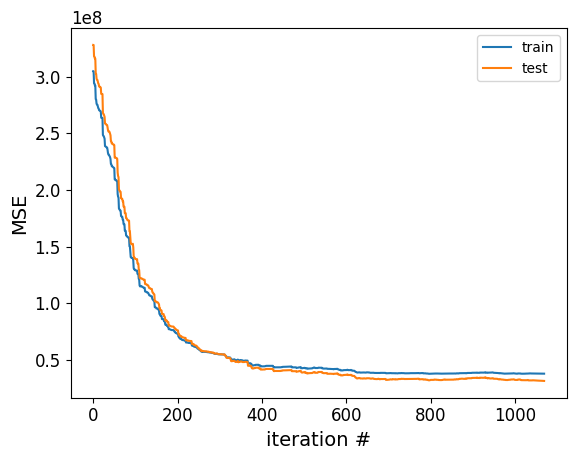

In [34]:
alpha = 0.005

w1 = np.random.randn(X_train.shape[1])  # random initialization
mse_train = []
mse_test = []
for x_i, y_i in zip(X_train, y_train): # x_i is an observation and y_i is the adequate output
    #--------------Implement your code here-------------------------  
    # Compute prediction
    y_pred_i = np.dot(x_i, w1)

    # Compute error
    error = y_pred_i - y_i

    # Update weights using SGD formula
    w1 = w1 - alpha * error * x_i

    # Compute and store MSE for train and test sets
    y_pred_train = X_train @ w1
    y_pred_test = X_test @ w1
    mse_train.append(np.mean((y_pred_train - y_train) ** 2))
    mse_test.append(np.mean((y_pred_test - y_test) ** 2))
    #---------------------------------------------------------------
plt.plot(np.arange(len(mse_train)), mse_train)
plt.plot(np.arange(len(mse_test)), mse_test)
plt.legend(("train", "test"))
plt.xlabel("iteration #")
plt.ylabel("MSE")
plt.show()

### Expected output:
<center><img src="outputs/9.PNG" width="450"><center>

---
<span style="color:red">***Question:***</span> *Did you expect the result you got? What happens if $ \alpha $ is too large? Try it!*

---

After you saw the effect it causes, set the learning rate back to normal and run the SGD again before proceeding.

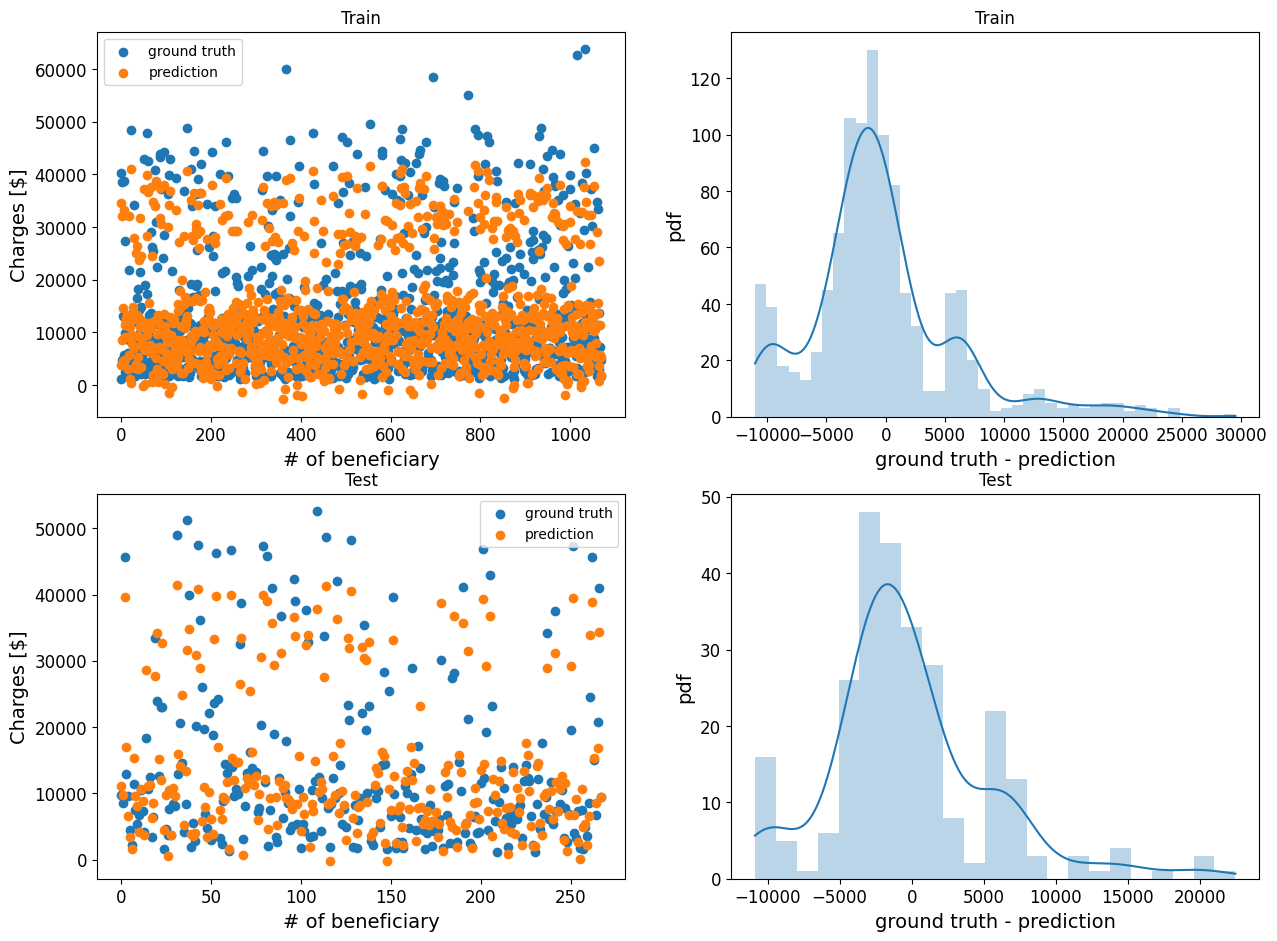

In [35]:
gt_array = [y_train, y_test] # ground truth
pred_array = [y_pred_train, y_pred_test] # predictions
plot_gt_vs_pred(gt_array, pred_array)

### Expected output:
<center><img src="outputs/10.PNG" width="480"><center>

All we did until now can be very easily implemented using a powerful machine learning package of Python that we already used briefly and we will use it a lot in this course:  `scikit-learn` or simply `sklearn`. Look at the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) of linear regression class and try to implement the linear regression using this package that was already imported at the top on the scaled dataset. Notice that your data already has a column of ones. What argument of `LinearRegression` should you change?

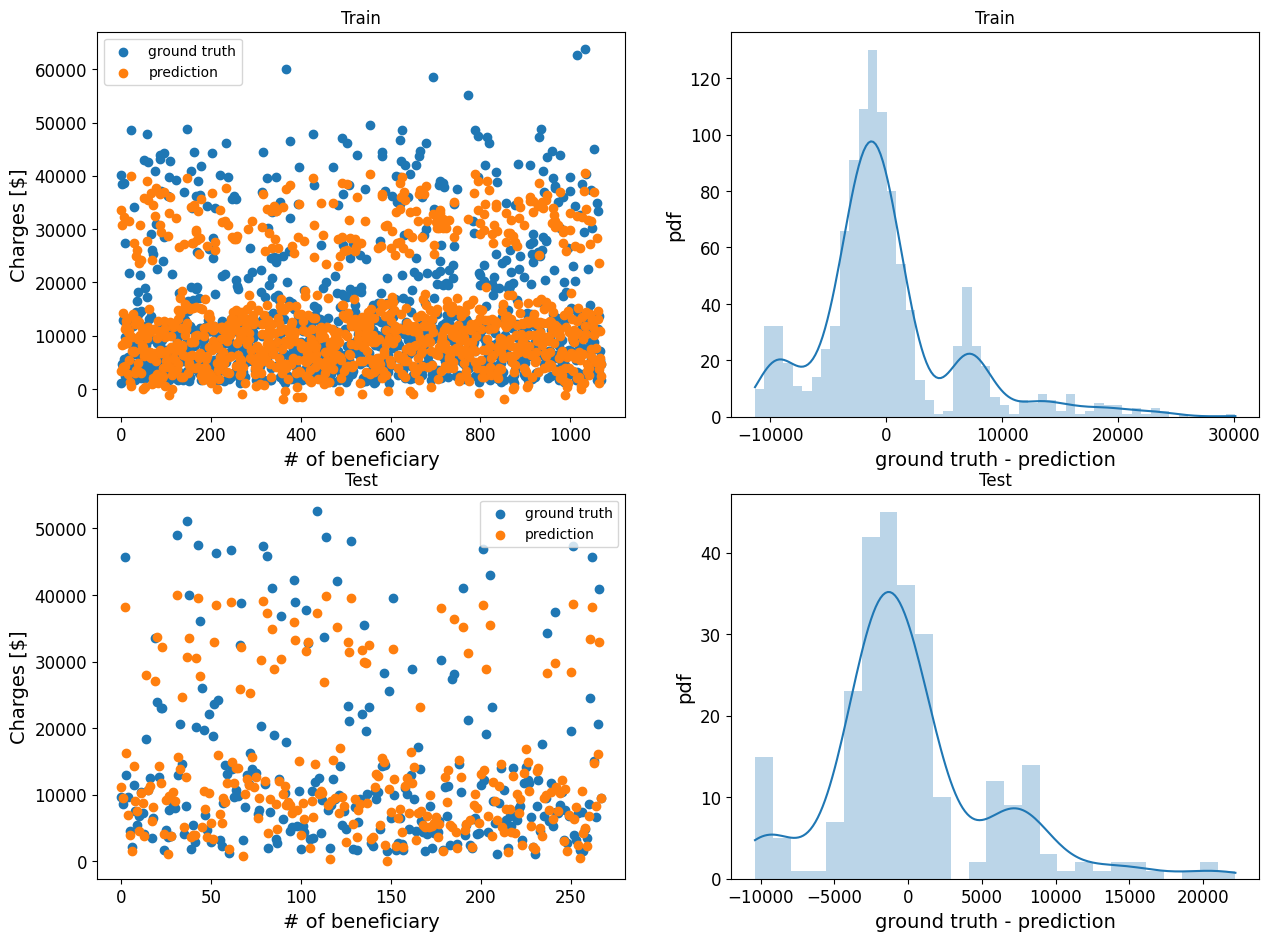

In [36]:
#--------------Implement your code here-------------------------

# Initialize Linear Regression model
model = LinearRegression(fit_intercept=False)  # Important! Data already has a bias term

# Fit the model on the training set
model.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


#---------------------------------------------------------------
gt_array = [y_train, y_test] # ground truth
pred_array = [y_pred_train, y_pred_test] # predictions
plot_gt_vs_pred(gt_array, pred_array)

### Expected output:
<center><img src="outputs/11.PNG" width="480"><center>

---
<span style="color:red">***Question:***</span> *Did you get any better with scaling?*

---

## Linear regression of a polynomial model

Let's assume that now we have a different dataset with a model that claims we should only use the variables of age and bmi, and we denote them as $ (x_1,x_2) $. The charges should be estimated as follows:

$$\begin{equation}
y = w_0 + w_1x_1x_2 + w_2x_2^2
\label{eq:poly} \tag{8}
\end{equation}
$$

We should notice that though the output is not a linear function of the features in the feature domain, it is **still linear with its parameters.** Thus we can look at the "mapped features" (feature that have gone through some transformation) and solve the problem as a linear regression problem in the new domain. Our "new features" and weights would be:

$$\begin{equation}
\tilde{X} = \begin{pmatrix}
    1 & x_{11}x_{12} & x_{12}^2 \\ 
    1 & x_{21}x_{22} & x_{22}^2 \\
    \vdots & \vdots & \vdots \\
    1 & x_{m1}x_{m2} & x_{m2}^2
\end{pmatrix}, \space \tilde{w} = \begin{pmatrix}
w_0\\
w_1\\
w_2
\end{pmatrix}
\label{eq:feat transform} \tag{9}
\end{equation}
$$

In this case, the maximum order of the polynomial is 2. We will use the `PolynomialFeatures` class of `scikit-learn` for this task. We will also use different dataset that contains only two features.
Let's load the new data first.

In [46]:
pol_data = np.load("data/pol_data.npz")
# preprocess after load
X_new = np.c_[pol_data['x1'].ravel(), pol_data['x2'].ravel()]
y = pol_data['data'].flatten()

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=10)

Now we should try and fit a linear model to the features. Fit your model upon the **unscaled** features and plot the results using `plot_gt_vs_pred` as before.

Coefficients: [-0.0736185  -0.18109665]
Intercept: 0.0


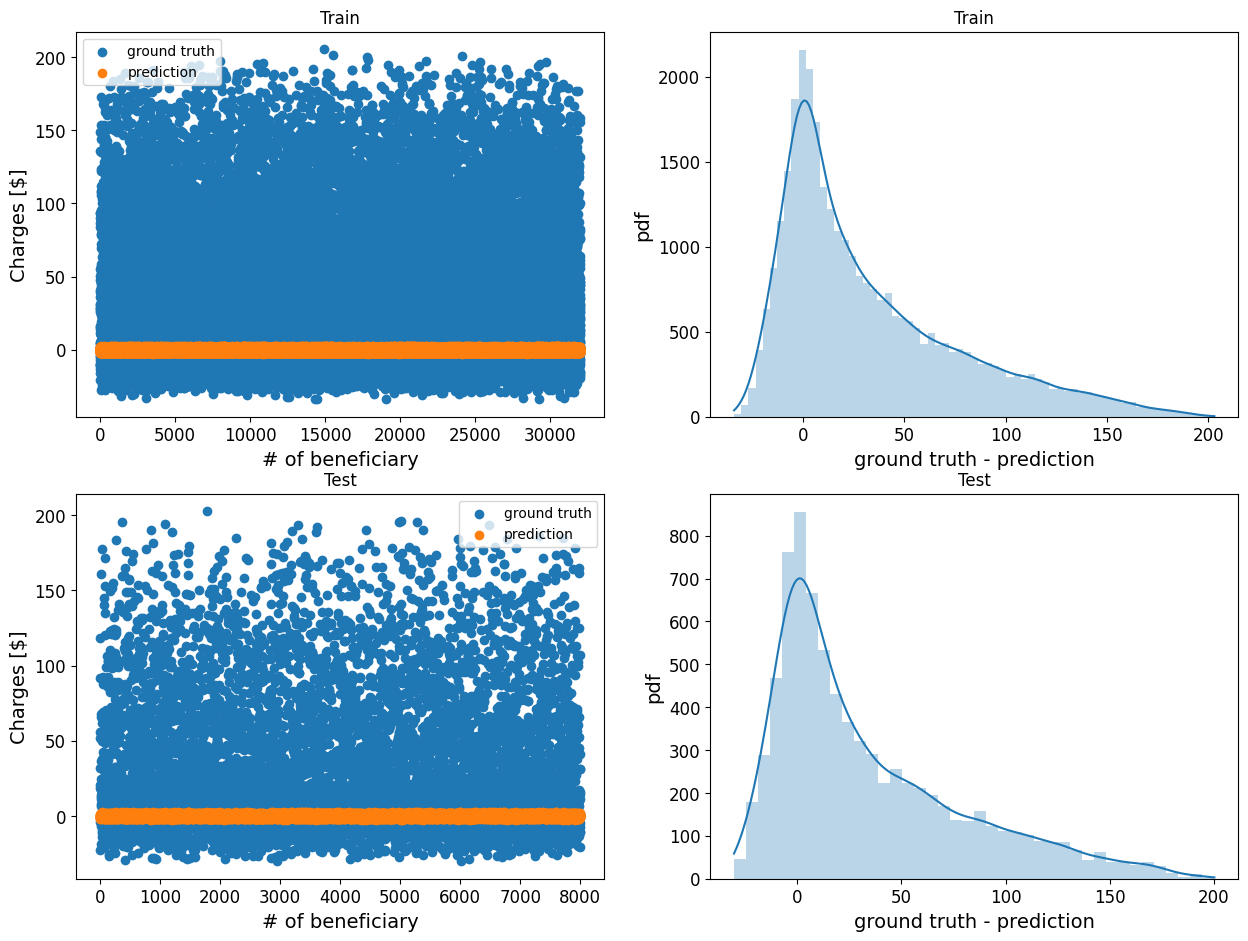

In [ ]:
#--------------Implement your code here-------------------------
# Fit a linear regression model to the transformed features
model = LinearRegression(fit_intercept=False)  # Already includes bias term
model.fit(X_train, y_train)
# Get learned coefficients
print("Coefficients:", model.coef_)  # Includes weights for x1, x2, and bias term

# If fit_intercept=True was used, also check the intercept
print("Intercept:", model.intercept_)  # Should be 0 if fit_intercept=False

# Predict on train and test sets
y_pred_train_lin = model.predict(X_train)
y_pred_test_lin = model.predict(X_test)
lin_reg = model
#---------------------------------------------------------------
gt_array = [y_train, y_test] # ground truth
pred_array = [y_pred_train_lin, y_pred_test_lin] # predictions
plot_gt_vs_pred(gt_array, pred_array)

### Expected output:
<center><img src="outputs/12.PNG" width="480"><center>

---
<span style="color:red">***Question:***</span> *What can you tell on the performance of the linear regression in the original domain?*

---

Now let's visualize the fitting process using the function `plot_lin` upon the testing set next to the original data.

In [63]:
def plot_lin(pol_data, x_y_axis, y_test, lin_reg):
    x1 = pol_data['x1']
    x2 = pol_data['x2']
    z = pol_data['z']
    data = pol_data['data']
    fig = plt.figure(figsize = (16, 10))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(x1, x2, z, cmap=cm.coolwarm,
                            linewidth=0, antialiased=False, alpha=0.5)
    R = np.random.randint(0, z.shape[0]*z.shape[1], (100,))
    ax.scatter(x1.flatten()[R], x2.flatten()[R], data.flatten()[R])
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    ax.set_zlabel('$y$')
    ax.view_init(elev=10, azim=140)
    ax.set_title('Original')
    
    x1, x2 = np.meshgrid(np.sort(x_y_axis[:,0]), np.sort(x_y_axis[:,1]))
    z = lin_reg.intercept_ + lin_reg.coef_[0]*x1 + lin_reg.coef_[1]*x2
    R = np.random.randint(0, y_test.shape[0], (100,))
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_surface(x1, x2, z, cmap=cm.coolwarm,
                            linewidth=0, antialiased=False, alpha=0.5)
    y_test = y_test[np.argsort(x1)]
    ax.scatter(x_y_axis[:,0].flatten()[R], x_y_axis[:,1].flatten()[R], y_test.flatten()[R])
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    ax.set_zlabel('$y$')
    ax.view_init(elev=10, azim=140)
    ax.set_title('Linear fit in feature domain')
    ax.set_zlim(0, 200)
    plt.tight_layout()

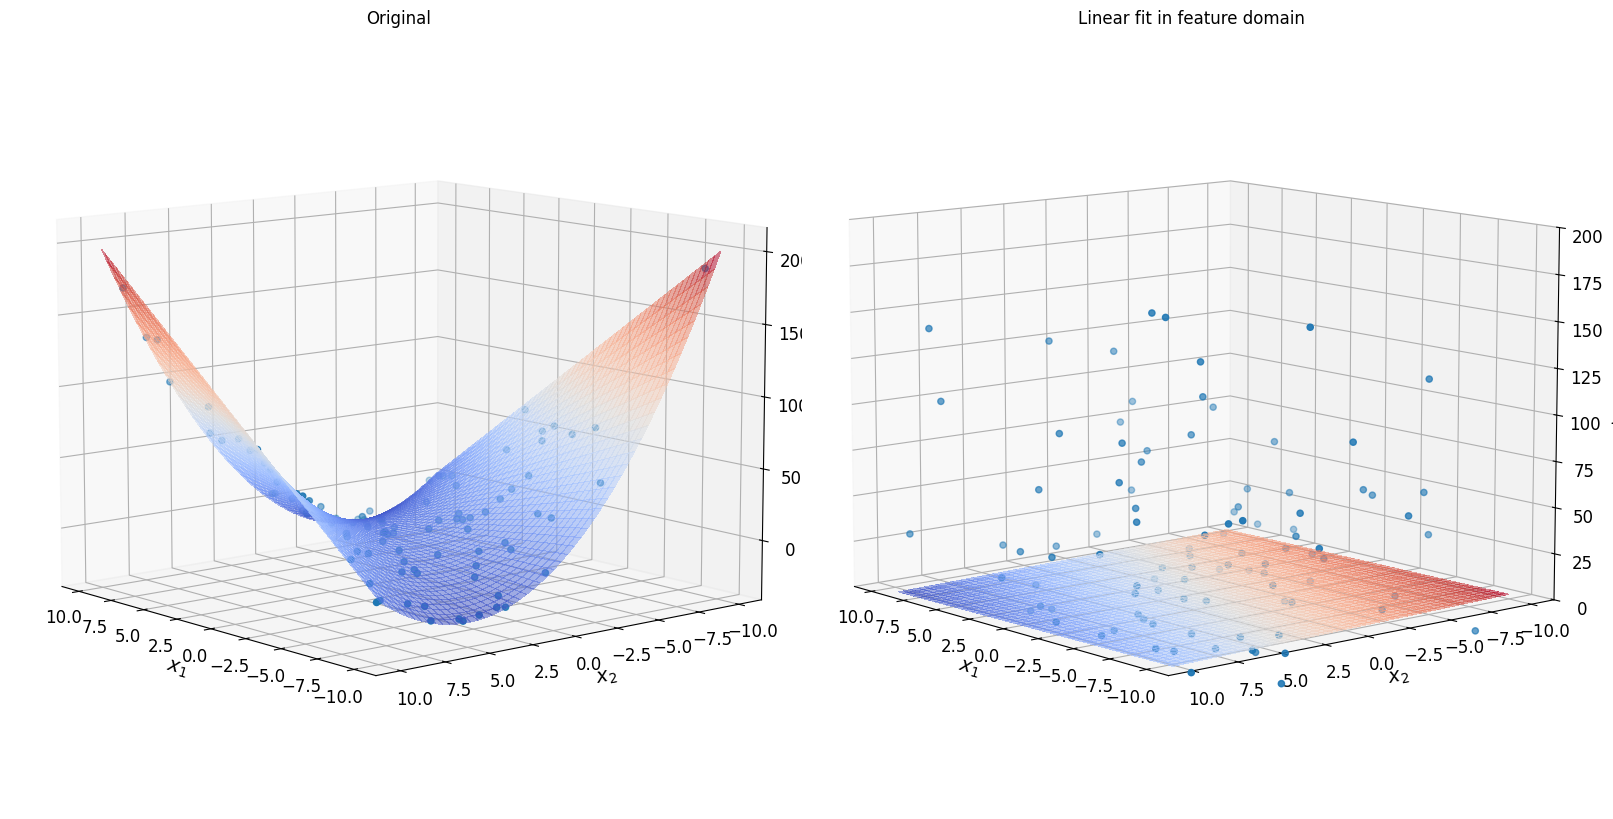

In [64]:
plot_lin(pol_data,X_test, y_test, lin_reg)

### Expected output:
<center><img src="outputs/13.PNG" width="480"><center>

You can see clearly that the data is not linear with the features. We should probably try a *polynomial* model. Fortunately, we can still use linear regression but we will have to apply it on the *transformed features*. Find out more about transforming features [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

In [66]:
#--------------Implement your code here:-------------------------
from sklearn.preprocessing import PolynomialFeatures

# Apply polynomial feature transformation (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=True)  # Include bias term (constant 1)
X_train_poly = poly.fit_transform(X_train)  # Transform training data
X_test_poly = poly.transform(X_test)  # Transform test data

print("Original features shape:", X_train.shape)
print("Transformed features shape:", X_train_poly.shape)

#---------------------------------------------------------------

Original features shape: (32000, 2)
Transformed features shape: (32000, 6)


Now, fit a linear regression model to the transformed features and plot the distributions using `plot_gt_vs_pred`.

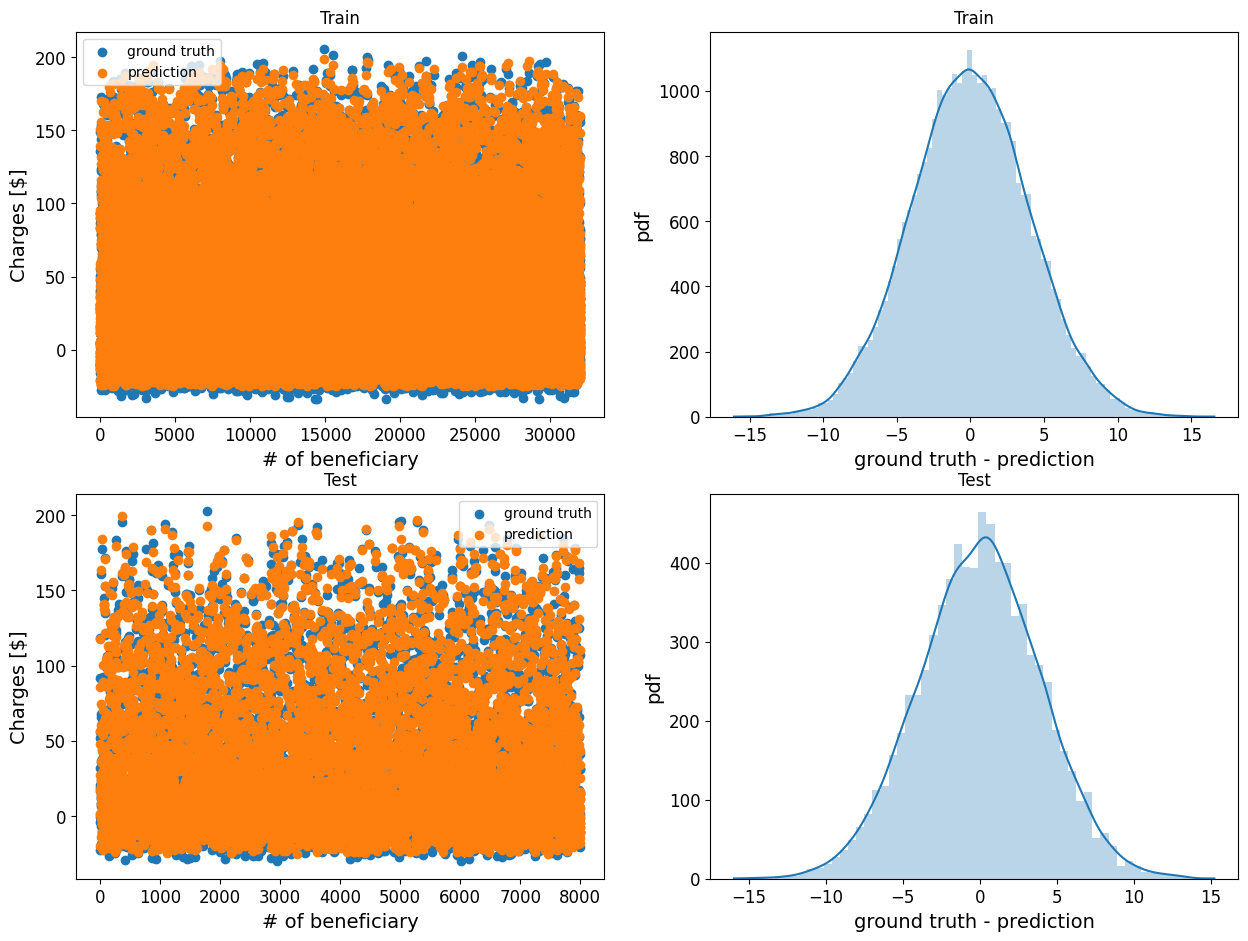

In [67]:
#--------------Implement your code here:-------------------------


# Step 1: Transform features (PolynomialFeatures with degree=2)
poly = PolynomialFeatures(degree=2, include_bias=True)  # Include bias term (column of ones)
X_train_poly = poly.fit_transform(X_train)  # Transform training data
X_test_poly = poly.transform(X_test)  # Transform test data

# Step 2: Train Linear Regression on transformed features
lin_reg = LinearRegression(fit_intercept=False)  # Bias is already included in poly features
lin_reg.fit(X_train_poly, y_train)

# Step 3: Make Predictions
y_pred_train_pol = lin_reg.predict(X_train_poly)  # Predictions on train set
y_pred_test_pol = lin_reg.predict(X_test_poly)  # Predictions on test set


#---------------------------------------------------------------
gt_array = [y_train, y_test] # ground truth
pred_array = [y_pred_train_pol, y_pred_test_pol] # predictions
plot_gt_vs_pred(gt_array, pred_array)

### Expected output:
<center><img src="outputs/14.PNG" width="480"><center>

The results are now much better. The distribution of the error is Gaussian which is exactly appropriate for our assumptions about the additive noise of the data. Print the coefficients of the model and choose the indices of the two most (and basically only) significant coefficients. Make them as a list called `rel_indices`. Choose the correct `x_label` and `y_label`. Use `LaTeX` as needed. The correct labels are hidden in the expected output on purpose.

Coefficients: [ 0.07263651  0.00503056  0.00685828 -0.00148605  0.9986992   0.99980362]
Indices of the most significant coefficients: [4, 5]


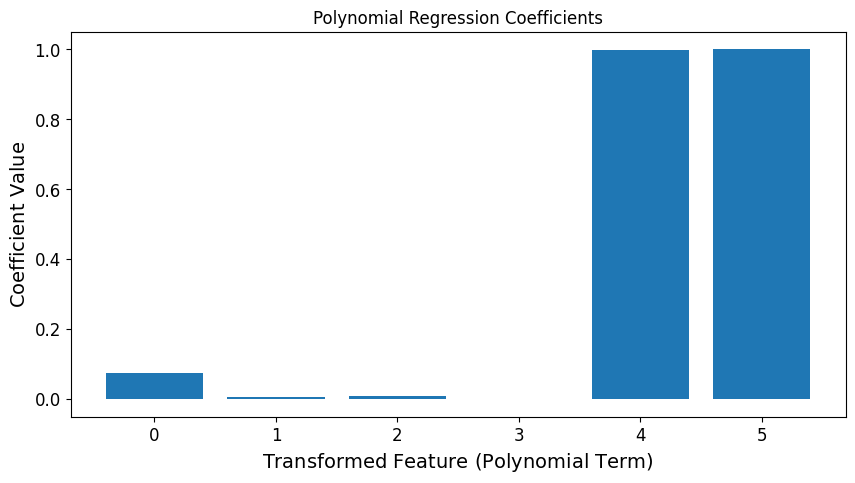

In [73]:


# Step 1: Print model coefficients
print("Coefficients:", lin_reg.coef_)

# Step 2: Identify the two most significant coefficients
# The most significant coefficients are those with the highest absolute values
sorted_indices = np.argsort(np.abs(lin_reg.coef_))  # Sort by absolute value
rel_indices = sorted_indices[-2:].tolist()  # Take the top 2 largest indices

print("Indices of the most significant coefficients:", rel_indices)

# Step 3: Choose appropriate labels using LaTeX formatting
x_label = r"$\text{Transformed Feature (Polynomial Term)}$"
y_label = r"$\text{Coefficient Value}$"

# Step 4: Plot coefficients

plt.figure(figsize=(10, 5))
plt.bar(range(len(lin_reg.coef_)), lin_reg.coef_)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title("Polynomial Regression Coefficients")
plt.show()


Now we can visualize the results in the transformed feature domain

In [69]:
def plot_pol(pol_data, rel_x_y_axis, y_test, lin_reg, rel_indices,x_label,y_label):
    x1 = pol_data['x1']
    x2 = pol_data['x2']
    z = pol_data['z']
    data = pol_data['data']
    fig = plt.figure(figsize = (16, 10))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(x1, x2, z, cmap=cm.coolwarm,
                            linewidth=0, antialiased=False, alpha=0.5)
    R = np.random.randint(0, z.shape[0]*z.shape[1], (100,))
    ax.scatter(x1.flatten()[R], x2.flatten()[R], data.flatten()[R])
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    ax.set_zlabel('$y$')
    ax.view_init(elev=10, azim=140)
    ax.set_title('Original')
    
    x1, x2 = np.meshgrid(np.sort(rel_x_y_axis[:,0]), np.sort(rel_x_y_axis[:,1]))
    z = lin_reg.coef_[0] + x1*lin_reg.coef_[rel_indices[0]] + x2*lin_reg.coef_[rel_indices[1]]
    R = np.random.randint(0, y_test.shape[0], (100,))
    ax = fig.add_subplot(1, 2, 2, projection='3d')

    ax.plot_surface(x1, x2, z, cmap=cm.coolwarm,
                            linewidth=0, antialiased=False, alpha=0.5)
    ax.scatter(rel_x_y_axis[:,0].flatten()[R], rel_x_y_axis[:,1].flatten()[R], y_test.flatten()[R])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax.set_zlabel('$y$')
    ax.view_init(elev=10, azim=125)
    ax.set_title('Linear fit in transformed feature domain')
    ax.set_xlim3d(-100, 100)
    ax.set_ylim3d(0, 100)
    ax.set_zlim3d(0, 200)
    plt.tight_layout()

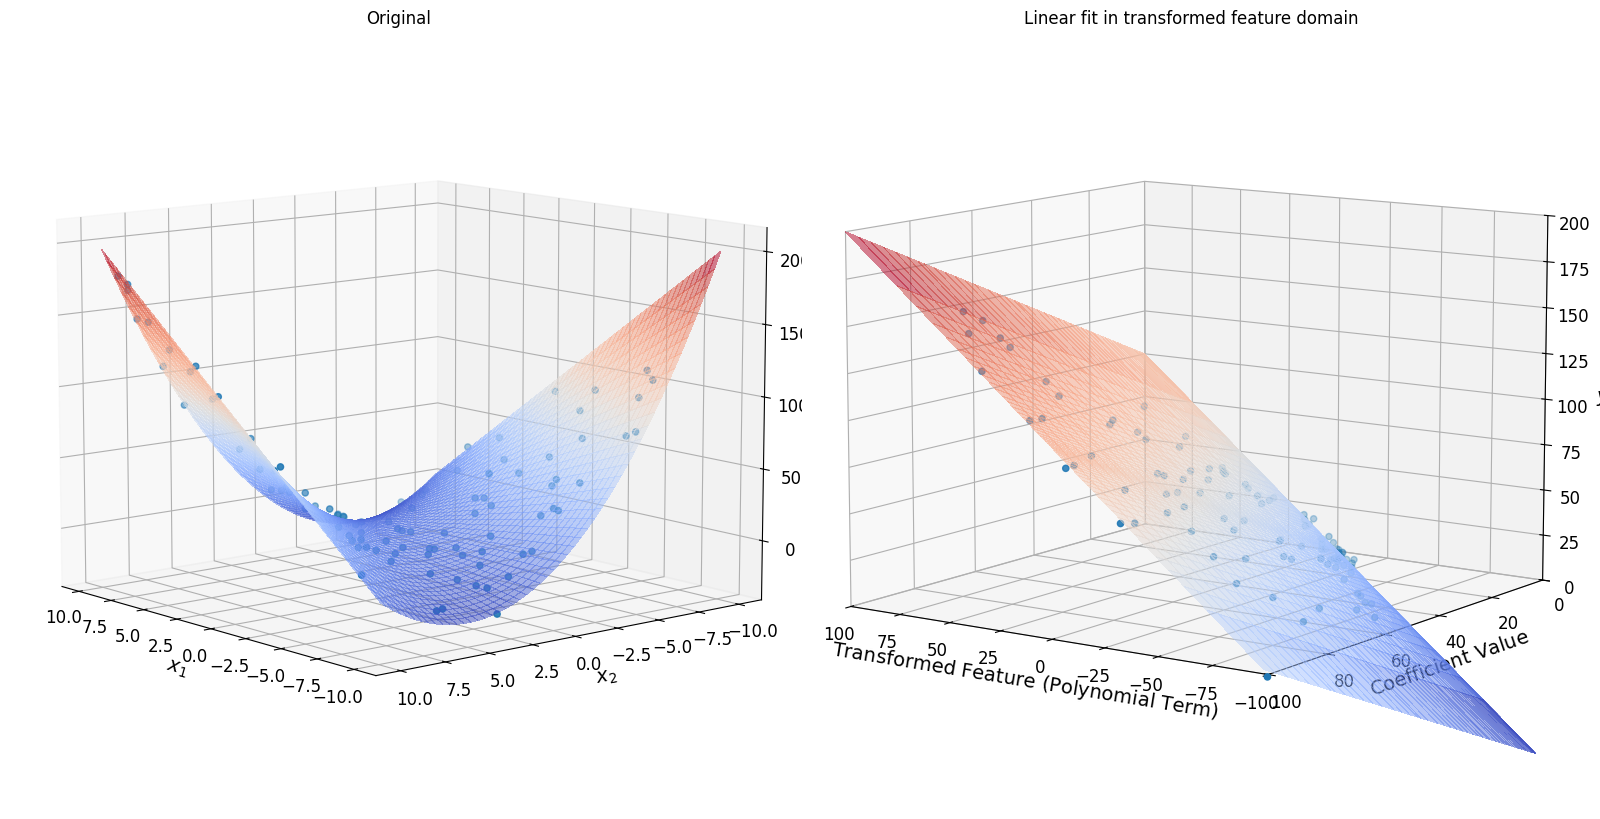

In [75]:
rel_x = X_test_poly[:, rel_indices]  # ✅ This ensures correct feature extraction
  # Extract only the two most significant features
plot_pol(pol_data, rel_x, y_test, lin_reg, rel_indices, x_label, y_label)


### Expected output:
<center><img src="outputs/15.PNG" width="480"><center>

Here we can see an important concept in machine learning: We don't always have to fit a non-linear model to our data but rather apply a non-linear transform to the features and then fit a linear model. The data can be linearized in a different domain.

# Usage in healthcare and conclusions

### In this tutorial we saw how to implement linear regression in several ways: 
>- Pseudoinverse 
>- SGD 
>- scikit-learn (that uses either one of them)

##### We noticed how sensitive SGD is to the learning rate and standardization.
##### The use of linear regression to predict health insurance costs (and by that estimate correctly the beneficiary's insurance premiums later on). 
##### We also saw how linear regression can be fitted to some other models rather than linear ones using features transformation.

Images credit:


[Linear regression](https://www.quora.com/q/qyczkaxdbcglctzy/The-Inception-of-a-Data-Scientist-Linear-Regression)


[Cost function](https://saugatbhattarai.com.np/what-is-gradient-descent-in-machine-learning/)

#### *This tutorial was written by [Moran Davoodi](mailto:morandavoodi@gmail.com) with the assitance of [Yuval Ben Sason](mailto:yuvalbse@gmail.com) & Kevin Kotzen*